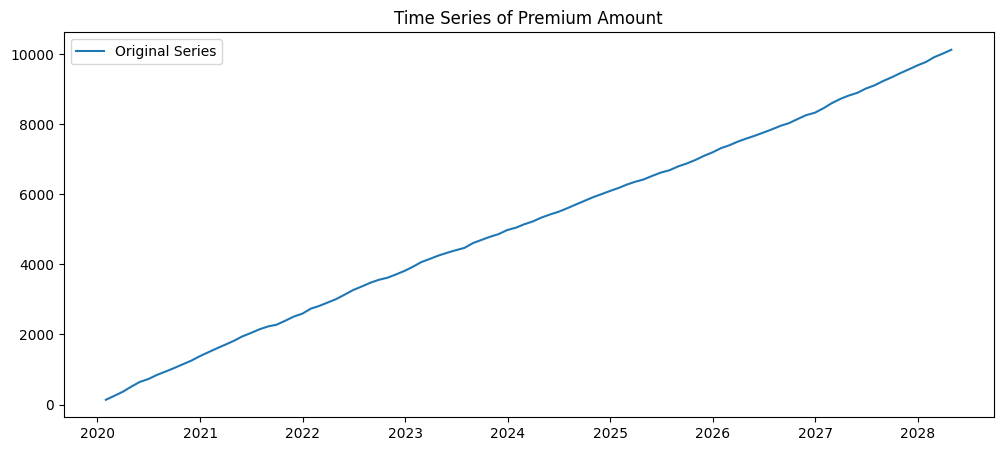

ADF Statistic: -0.6312777182673567
p-value: 0.8637567802673147
Series is not stationary. Differencing needed.


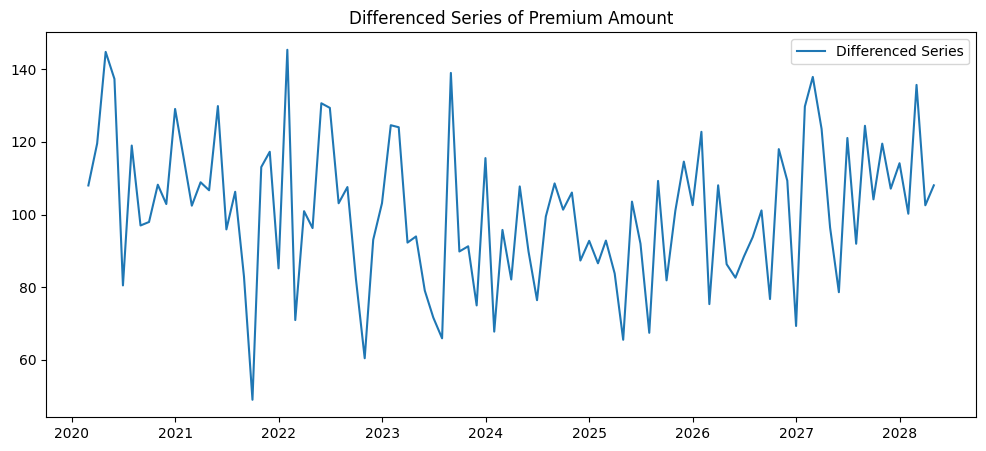

ADF Statistic: -9.15840200294013
p-value: 2.572286538327882e-15
Differenced series is stationary.


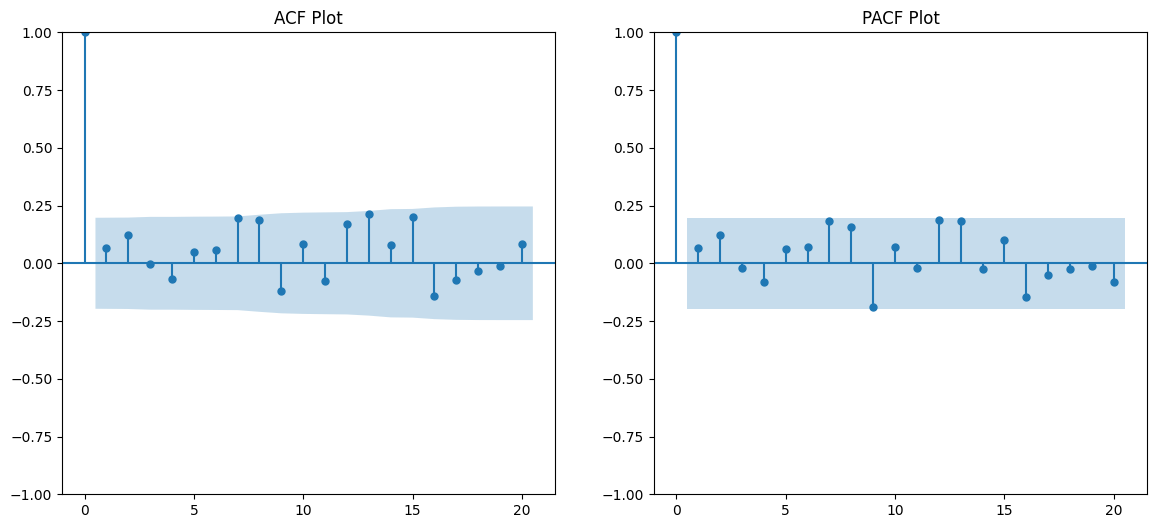

ARIMA(0,1,0) - AIC: 1200.25857172913
ARIMA(0,1,1) - AIC: 1113.2404704144294
ARIMA(0,1,2) - AIC: 1058.4816336342717
ARIMA(1,1,0) - AIC: 941.3072970166908
ARIMA(1,1,1) - AIC: 884.1213188192378
ARIMA(1,1,2) - AIC: 886.021042999679
ARIMA(2,1,0) - AIC: 912.2011289749009
ARIMA(2,1,1) - AIC: 886.0135982053519
ARIMA(2,1,2) - AIC: 887.947882752546
Best ARIMA model order: (1, 1, 1) with AIC: 884.1213188192378
                               SARIMAX Results                                
Dep. Variable:         Premium_Amount   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -439.061
Date:                Mon, 28 Oct 2024   AIC                            884.121
Time:                        10:22:46   BIC                            891.907
Sample:                    01-31-2020   HQIC                           887.271
                         - 04-30-2028                                         
Covariance Type:                  opg       

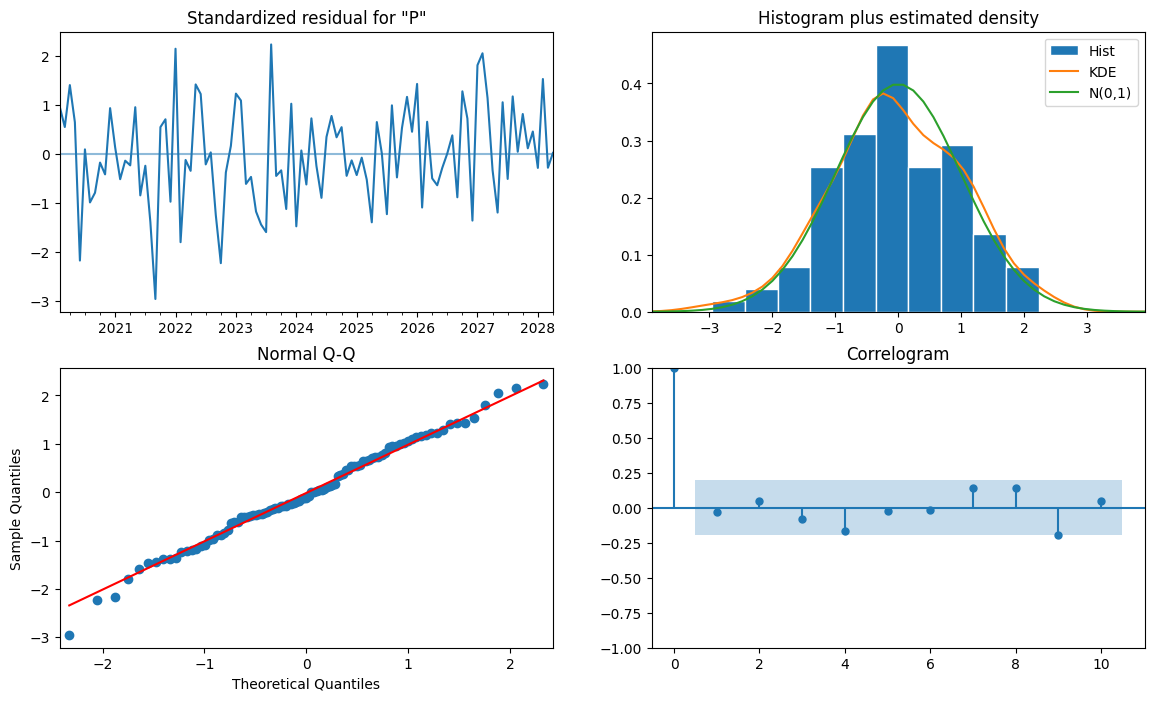

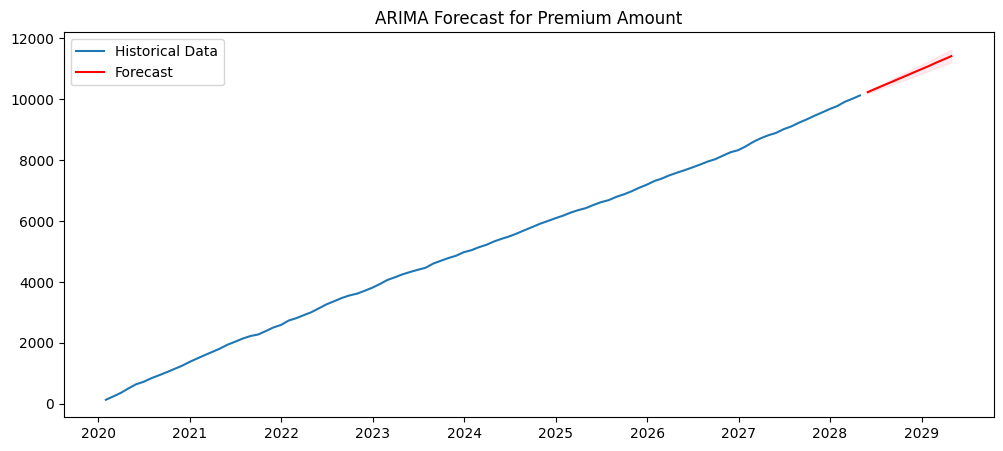

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

# Generate synthetic time series data
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=100, freq='M')
premium_amounts = np.cumsum(np.random.normal(loc=100, scale=20, size=100))  # Cumulative sum to mimic a trend
df = pd.DataFrame({'Date': dates, 'Premium_Amount': premium_amounts})
df.set_index('Date', inplace=True)

# Plot the original time series
plt.figure(figsize=(12, 5))
plt.plot(df['Premium_Amount'], label="Original Series")
plt.title("Time Series of Premium Amount")
plt.legend()
plt.show()

# Step 1: Check for stationarity using ADF Test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1]  # return p-value for further checks

p_value = adf_test(df['Premium_Amount'])
if p_value < 0.05:
    print("Series is stationary.")
else:
    print("Series is not stationary. Differencing needed.")

# Step 2: Differencing the series to make it stationary
df_diff = df['Premium_Amount'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 5))
plt.plot(df_diff, label="Differenced Series")
plt.title("Differenced Series of Premium Amount")
plt.legend()
plt.show()

# Re-run ADF test on differenced series
p_value_diff = adf_test(df_diff)
if p_value_diff < 0.05:
    print("Differenced series is stationary.")
else:
    print("Differenced series is still not stationary; consider further differencing.")

# Step 3: Plot ACF and PACF to identify p and q
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(df_diff, ax=plt.gca(), lags=20)
plt.title("ACF Plot")

plt.subplot(122)
plot_pacf(df_diff, ax=plt.gca(), lags=20)
plt.title("PACF Plot")
plt.show()

# Based on ACF and PACF, try different values for p and q
# For this example, assume initial choices based on ACF/PACF plots are p=1, d=1, q=1

# Step 4: Fit ARIMA model and check AIC for optimization
# Trying a range of values to minimize AIC
best_aic = np.inf
best_order = None
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(df['Premium_Amount'], order=(p, 1, q))
            results = model.fit()
            print(f'ARIMA({p},1,{q}) - AIC: {results.aic}')
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = (p, 1, q)
        except:
            continue

print(f"Best ARIMA model order: {best_order} with AIC: {best_aic}")

# Step 5: Fit the final model
model = ARIMA(df['Premium_Amount'], order=best_order)
results = model.fit()
print(results.summary())

# Step 6: Plot diagnostics
results.plot_diagnostics(figsize=(14, 8))
plt.show()

# Step 7: Forecasting with the best model
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 5))
plt.plot(df['Premium_Amount'], label="Historical Data")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color="red", label="Forecast")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3)
plt.legend()
plt.title("ARIMA Forecast for Premium Amount")
plt.show()


To provide a more detailed explanation of how to determine the values of 
𝑝
p, 
𝑑
d, and 
𝑞
q for an ARIMA model, let’s break down the process further. We’ll include visualizations, calculations, and reasoning behind selecting these parameters based on the characteristics of the time series data.

Step-by-Step Guide to Determine 
𝑝
p, 
𝑑
d, and 
𝑞
q
1. Understanding 
𝑑
d (Differencing Order)
Purpose: The differencing order 
𝑑
d is used to make a non-stationary time series stationary by removing trends and seasonality.

Stationarity Check: You can use the ADF (Augmented Dickey-Fuller) test to check for stationarity. If the p-value is greater than 0.05, the series is non-stationary, and differencing is required.

First Differencing: If the series is not stationary, perform first differencing (y[t] - y[t-1]) and check again. You might need to difference multiple times (though typically 
𝑑
d is 0, 1, or 2).

2. Choosing 
𝑝
p (AR Order)
ACF and PACF Plots: After differencing, plot the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) to identify the autoregressive (AR) and moving average (MA) terms.

PACF: Look at the PACF plot. The point at which the PACF cuts off (drops to zero) gives you an estimate of 
𝑝
p. If it shows a significant spike at lag 1 and then drops off, set 
𝑝
=
1
p=1.

ACF: The ACF can help confirm the 
𝑝
p value by ensuring the autocorrelations at lags less than 
𝑝
p are significant.

3. Choosing 
𝑞
q (MA Order)
ACF Plot: Use the ACF plot to determine 
𝑞
q. The number of lags that are significant in the ACF plot gives you an estimate for 
𝑞
q. If the ACF cuts off after lag 1, set 
𝑞
=
1
q=1.
4. Model Selection Using AIC/BIC
After getting initial estimates for 
𝑝
p, 
𝑑
d, and 
𝑞
q, fit various combinations of these parameters and choose the model with the lowest AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion). Lower values indicate a better fit.
Example Code to Determine 
𝑝
p, 
𝑑
d, and 
𝑞
q
Below is the full code with detailed comments explaining how to determine 
𝑝
p, 
𝑑
d, and 
𝑞
q using ADF tests, ACF, and PACF plots, followed by model fitting:

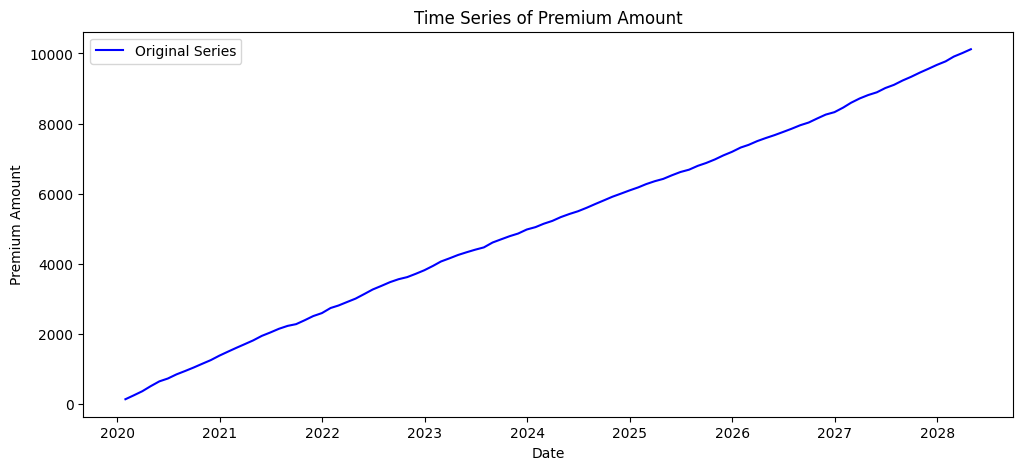

ADF Statistic: -0.6312777182673567
p-value: 0.8637567802673147
Original series is not stationary. Differencing needed.


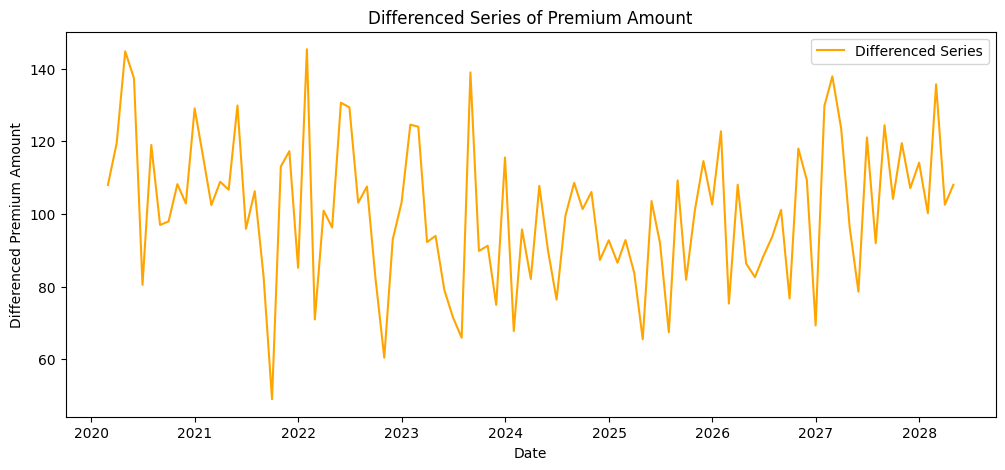

ADF Statistic: -9.15840200294013
p-value: 2.572286538327882e-15
Differenced series is stationary.


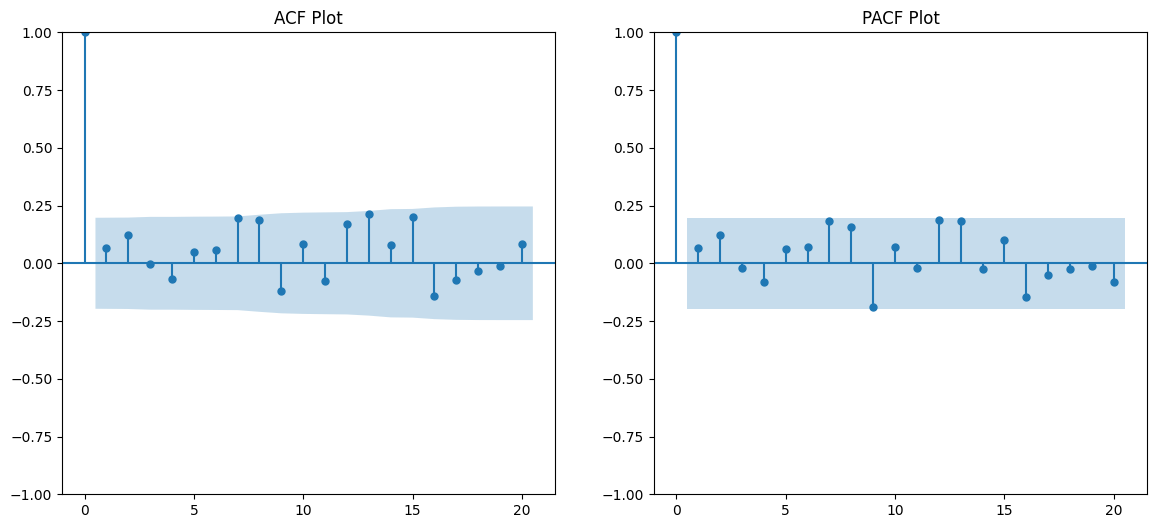

ARIMA(0,1,0) - AIC: 1200.25857172913
ARIMA(0,1,1) - AIC: 1113.2404704144294
ARIMA(0,1,2) - AIC: 1058.4816336342717
ARIMA(1,1,0) - AIC: 941.3072970166908
ARIMA(1,1,1) - AIC: 884.1213188192378
ARIMA(1,1,2) - AIC: 886.021042999679
ARIMA(2,1,0) - AIC: 912.2011289749009
ARIMA(2,1,1) - AIC: 886.0135982053519
ARIMA(2,1,2) - AIC: 887.947882752546
Best ARIMA model order: (1, 1, 1) with AIC: 884.1213188192378
                               SARIMAX Results                                
Dep. Variable:         Premium_Amount   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -439.061
Date:                Mon, 28 Oct 2024   AIC                            884.121
Time:                        10:24:06   BIC                            891.907
Sample:                    01-31-2020   HQIC                           887.271
                         - 04-30-2028                                         
Covariance Type:                  opg       

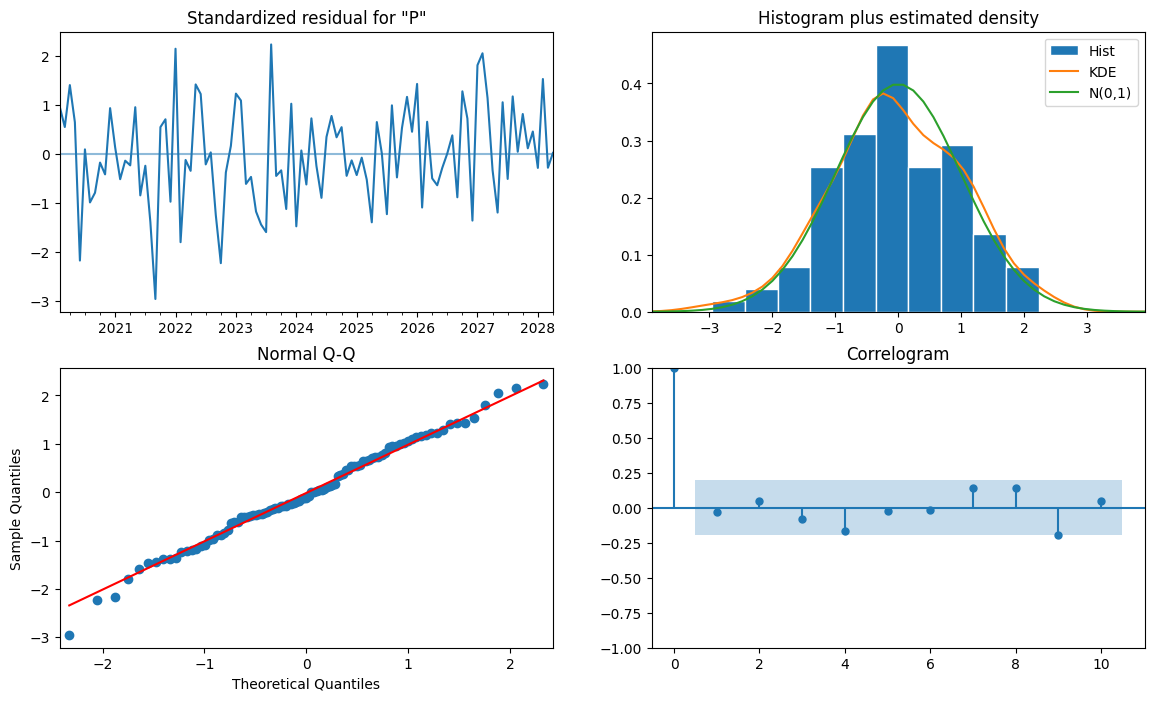

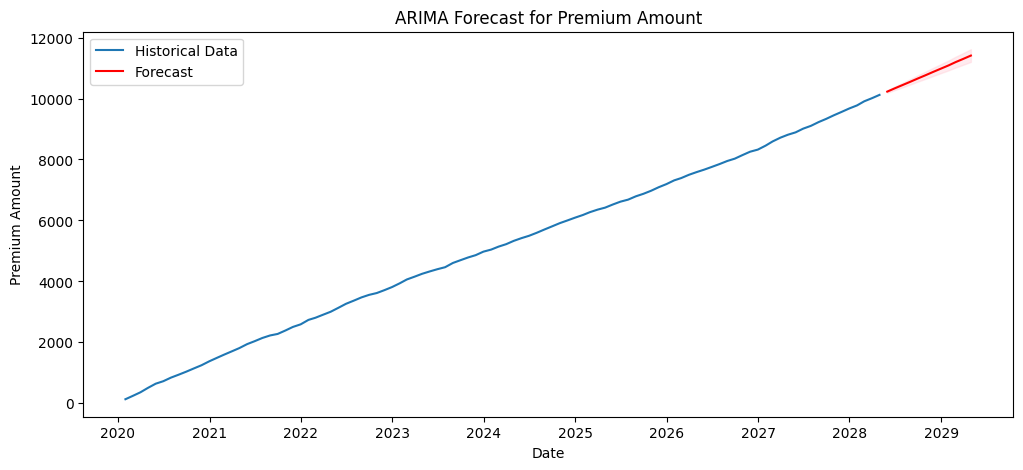

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

# Generate synthetic time series data
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=100, freq='M')
premium_amounts = np.cumsum(np.random.normal(loc=100, scale=20, size=100))  # Cumulative sum to mimic a trend
df = pd.DataFrame({'Date': dates, 'Premium_Amount': premium_amounts})
df.set_index('Date', inplace=True)

# Step 1: Plot the original time series
plt.figure(figsize=(12, 5))
plt.plot(df['Premium_Amount'], label="Original Series", color='blue')
plt.title("Time Series of Premium Amount")
plt.xlabel("Date")
plt.ylabel("Premium Amount")
plt.legend()
plt.show()

# Step 2: Check for stationarity using ADF Test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1]  # return p-value for further checks

# Check ADF for original series
p_value = adf_test(df['Premium_Amount'])
if p_value < 0.05:
    print("Original series is stationary.")
else:
    print("Original series is not stationary. Differencing needed.")

# Step 3: Differencing the series to make it stationary
df_diff = df['Premium_Amount'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 5))
plt.plot(df_diff, label="Differenced Series", color='orange')
plt.title("Differenced Series of Premium Amount")
plt.xlabel("Date")
plt.ylabel("Differenced Premium Amount")
plt.legend()
plt.show()

# Re-run ADF test on differenced series
p_value_diff = adf_test(df_diff)
if p_value_diff < 0.05:
    print("Differenced series is stationary.")
else:
    print("Differenced series is still not stationary; consider further differencing.")

# Step 4: Plot ACF and PACF to identify p and q
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(df_diff, ax=plt.gca(), lags=20)
plt.title("ACF Plot")

plt.subplot(122)
plot_pacf(df_diff, ax=plt.gca(), lags=20)
plt.title("PACF Plot")
plt.show()

# Based on the ACF/PACF plots, choose initial p and q values
# For example:
p = 1  # Assume PACF shows significant spike at lag 1
d = 1  # We applied first differencing
q = 1  # Assume ACF shows significant spike at lag 1

# Step 5: Fit ARIMA model and check AIC for optimization
best_aic = np.inf
best_order = None

# Try a range of values to minimize AIC
for p in range(3):  # Testing p = 0, 1, 2
    for q in range(3):  # Testing q = 0, 1, 2
        try:
            model = ARIMA(df['Premium_Amount'], order=(p, d, q))
            results = model.fit()
            print(f'ARIMA({p},{d},{q}) - AIC: {results.aic}')
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = (p, d, q)
        except:
            continue

print(f"Best ARIMA model order: {best_order} with AIC: {best_aic}")

# Step 6: Fit the final model
final_model = ARIMA(df['Premium_Amount'], order=best_order)
final_results = final_model.fit()
print(final_results.summary())

# Step 7: Plot diagnostics
final_results.plot_diagnostics(figsize=(14, 8))
plt.show()

# Step 8: Forecasting with the best model
forecast = final_results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 5))
plt.plot(df['Premium_Amount'], label="Historical Data")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color="red", label="Forecast")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3)
plt.legend()
plt.title("ARIMA Forecast for Premium Amount")
plt.xlabel("Date")
plt.ylabel("Premium Amount")
plt.show()
